https://guides.github.com/activities/citable-code/

In [10]:
from importlib import reload
import cohort_model
import fitness_calculations
import figures
reload(figures)
reload(cohort_model)
reload(fitness_calculations)

<module 'fitness_calculations' from '/Users/oda/Dropbox/1 Prosjekt/risky_ageing/fitness_calculations.py'>

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.optimize import brentq

from cohort_model import get_cohort_model_data, get_mean_and_std, population_survivorship_difference, HYP_WILD_TYPE, MUTANT_WILD
import figures

from fitness_calculations import get_fitness_data, homarus_fertility

In [5]:
### Common parameters for figures 1, 2 ###
number_of_individuals = 1000
alpha = 0.000222
kappa = 0.033
epsilon = 0.04
hazard_rate_wild_type = 0.04015625 # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet

# Figure 1

In [6]:
### Figure 1 specific parameters ###
number_of_repetitions = 100
t_m_captivity = 201
t_m_wild = 100
t_m_hyp_wt = 100

In [7]:
%%time
captivity_population, wild_population, hyp_wt_population = get_cohort_model_data(
        t_m_captivity=t_m_captivity,
        t_m_wild=t_m_wild,
        t_m_hyp_wt=t_m_hyp_wt, 
        number_of_individuals=number_of_individuals,
        alpha=alpha,
        kappa=kappa,
        epsilon=epsilon,
        hazard_rate_wild_type=hazard_rate_wild_type, # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet
        number_of_repetitions=number_of_repetitions)

CPU times: user 7.61 s, sys: 7.3 s, total: 14.9 s
Wall time: 15 s


In [8]:
mean_captivity, std_captivity = get_mean_and_std(captivity_population)
mean_wild, _ = get_mean_and_std(wild_population)
mean_hyp_wt, std_hyp_wt = get_mean_and_std(hyp_wt_population)

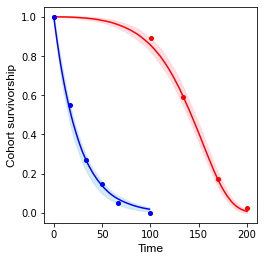

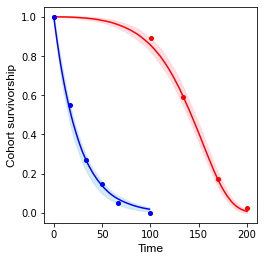

In [14]:
figures.plot_fig_1(
    t_m_captivity=t_m_captivity,
    t_m_wild=t_m_wild,
    t_m_hyp_wt=t_m_hyp_wt,
    mean_captivity=mean_captivity, 
    std_captivity=std_captivity, 
    mean_wild=mean_wild,
    mean_hyp_wt=mean_hyp_wt,
    std_hyp_wt=std_hyp_wt
)

# Figure 2

In [8]:
### Figure 2 specific parameters ###
number_of_repetitions = 1000 # Also used in figure 3
t_m = 100  # Also used in figure 3
epsilons = np.array([0.01, 0.02, 0.03, 0.04])
hazard_rates_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

In [9]:
%%time
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    alpha=alpha,
    kappa=kappa,
    t_m=t_m
)

CPU times: user 1min 54s, sys: 1min 32s, total: 3min 26s
Wall time: 3min 32s


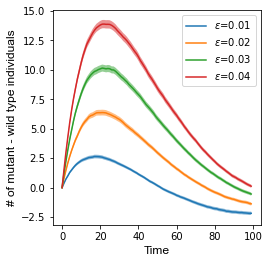

In [10]:
figures.plot_fig_2(t_m, mean_diff, std_diff, number_of_repetitions)

# Figure 3

In [11]:
### Figure 3 specific parameters ###
# population_simulations parameter is carried over as a result from calculations for figure 2 (make sure you don't use the one created in fig 5)

# OBS: Endre til 38 og 78, nå som t1 => t0?
fertility_wt = [(39, 24.0), (79, 24.0)]
fertility_mut = [(39, 24.0), (79, 18.0)]

In [12]:
%%time
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], number_of_repetitions, t_m, fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], number_of_repetitions, t_m, fertility_mut)

CPU times: user 1.44 s, sys: 19.9 ms, total: 1.46 s
Wall time: 1.45 s


Increase in R0 from hypothetical wild type to mutant: 1.36%
Increase in r from hypothetical wild type to mutant: 2.76%


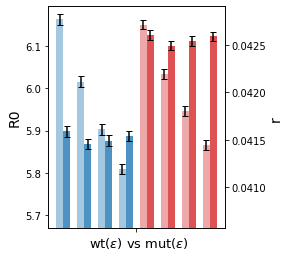

In [13]:
figures.plot_fig_3(fitness_stats_wt, fitness_stats_mut)

mean_r0_wt = fitness_stats_wt["mean_r0"]
mean_r_wt = fitness_stats_wt["mean_r"]
mean_r0_mut = fitness_stats_mut["mean_r0"]
mean_r_mut = fitness_stats_mut["mean_r"]

print(f"Increase in R0 from hypothetical wild type to mutant: {(mean_r0_mut[3] - mean_r0_wt[3]) / mean_r0_wt[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(mean_r_mut[3] - mean_r_wt[3]) / mean_r_wt[3] * 100:.2f}%")

# Figure 4

# Figure 5

In [14]:
# Figure 5 specific parameters
hazard_rates_wt = np.array(0.077).repeat(4)

beta =  0.8
sigma = 1.0
gamma = 4.0
mu = 50.0
frequency = 4 # Birth terms every nth time step

In [15]:
%%time
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    alpha=alpha,
    kappa=kappa,
    t_m=t_m,
    beta=beta
)

CPU times: user 1min 51s, sys: 1min 30s, total: 3min 22s
Wall time: 3min 24s


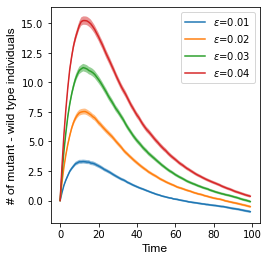

In [16]:
# Figure not in paper, but the simulation data are needed for figure 5
figures.plot_fig_2(t_m, mean_diff, std_diff, number_of_repetitions)

In [17]:
f_wt = homarus_fertility(t_m, sigma, gamma, frequency, HYP_WILD_TYPE)
fertility_wt = list(zip(range(t_m), f_wt))

f_mut = homarus_fertility(t_m, sigma, gamma, frequency, MUTANT_WILD, mu=mu, alpha=alpha, kappa=kappa)
fertility_mut = list(zip(range(t_m), f_mut))

In [18]:
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], number_of_repetitions, t_m, fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], number_of_repetitions, t_m, fertility_mut)

Increase in R0 from hypothetical wild type to mutant: 2.87%
Increase in r from hypothetical wild type to mutant: 1.75%


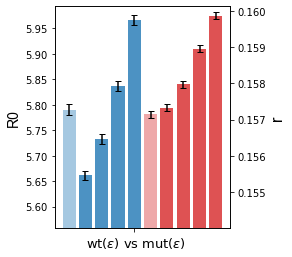

In [19]:
figures.plot_fig_5(fitness_stats_wt, fitness_stats_mut)

mean_r0_wt = fitness_stats_wt["mean_r0"]
mean_r_wt = fitness_stats_wt["mean_r"]
mean_r0_mut = fitness_stats_mut["mean_r0"]
mean_r_mut = fitness_stats_mut["mean_r"]

print(f"Increase in R0 from hypothetical wild type to mutant: {(mean_r0_mut[3] - mean_r0_wt[3]) / mean_r0_wt[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(mean_r_mut[3] - np.mean(mean_r_wt)) / np.mean(mean_r_wt) * 100:.2f}%")